# 5. Limity posloupností a funkcí

V tomto notebooku se budeme věnovat jednomu z ústředních témat BI-MA1 - výpočtu limit funkcí a posloupností.

## 5.1 Výpočet pomocí `limit`

Pokud chceme pomocí SageMath (ale i _Mathematica_) počítat limity posloupností je vhodné dát příslušnému počítačovému algebraickému systému na vědomí, že počítáme s diskrétní celočíselnou proměnnou.
Obešli bychom se i bez toho, ale pak může dojít k překvapením.

In [1]:
var('n,x')
assume(n,'integer')

O proměnné $x$ jsme žádný předpoklad neučinili. O $n$ předpokládáme, že je celočíselná.

Potom SageMath korektně vyhodnotí následující příklad.

In [2]:
limit(sin(pi*n), n=+infinity)

0

Ve skutečnosti jde totiž o limitu konstantní posloupnosti $(0)_{n=1}^\infty$, pro každé celočíselné $n$ totiž platí $\sin(\pi n) = 0$.
Naproti tomu se podívejme na následující výsledek.

In [3]:
limit(sin(pi*x), x=+infinity)

ind

Pokud o proměnné neučiníme žádný předpoklad, SageMath automaticky počítá s **komplexní** proměnnou, to pro nás většinou není problém, ale v některých situacích (viz dále) je to zásadní.
Funkce $x\mapsto\sin(\pi x)$ je periodická nekonstatní a nemá v nekonečnu limitu (o tom se nejlépe pčesvědčíme pomocí Heineho věty, viz níže).

Návratová hodnota `ind` je zkratkou slovíčka _indeterminate_, tedy neurčitý výraz.
V této situaci také musíme být opatrní.
Není jasné, jestli daná funkce/posloupnost skutečně limitu nemá, nebo jen algoritmus není schopen rozhodnout.

Všimněte si, že dvě předchozí buňky se vlastně neliší, až na označení proměnné.
Zásadní rozdíl je předpoklad zadaný pomocí `assume` v první buňce.
Seznam aktuálních předpokladů lze vypsat pomocí metody `assumptions` a smazat pomocí `forget`.

In [4]:
assumptions()

[n is integer]

## 5.2 Nekonečna a jednostranné limity

Na chvíli se ještě zastavme u funkce `limit`.
K zápisu nekonečna lze vedle `infinity` použít i zkrácené `oo` (dvě malá "o" vedle sebe).
Pod `infinity` i `oo` SageMath "chápe" symbol $+\infty$ z BI-MA1, který podrobně reprezentuje řetězcem `+Infinity`.
Záporné nekonečně pak znázorňuje pomocí `-Infinity`:

In [5]:
oo

+Infinity

In [6]:
infinity

+Infinity

In [7]:
-oo

-Infinity

Alternativně mám k dispozici i hezký výpis pomocí LaTeXu:

In [8]:
show(oo)

+Infinity

In [9]:
show(-oo)

-Infinity

Algebraické operace s těmito objekty ne/probíhají tak jak jsme zvyklí:

In [10]:
oo + 50

+Infinity

In [11]:
(-2) * oo

-Infinity

In [12]:
10^10 / oo

0

Ale!

In [13]:
oo + (-oo)

SignError: cannot add infinity to minus infinity

In [14]:
oo * 0

SignError: cannot multiply infinity by zero

**Pozor**, v některých případech dostaneme jako výstup příkazu `limit` (ale potenciálně i jiných příkazů) pouze `Infinity`.
Pak jde o **komplexní nekonečno**, v ten moment SageMath předstírá výpočet limity funkce/posloupnosti s komplexními hodnotami. Například:

In [15]:
limit(1 / x, x=0)

Infinity

Tento výsledek není v rozporu s BI-MA1, protože funkci $1/x$ chápe jako funkci s hodnotami v $\mathbb{C}$, kde lze rozumně zavést pouze jeden symbol nekonečna.
V BI-MA1 pro rozšíření reálné osy striktně používáme pouze symboly $+\infty$ a $-\infty$, pozorný student si toho jistě všiml.

Dobře, dokážeme ale ze SageMath v tomto případě dostat odpověď, který by více odpovídala tomu, co očekáváme?
Přdpoklad o reálnosti $x$, který jsme doposud neučinili, nám nepomůže.
"Problém" pramení z oboru hodnot dané funkce.

In [16]:
assume(x, 'real')

In [17]:
limit(1 / x, x=0)

Infinity

Funkce `limit` přijímá několik nepovinných parametrů, v tento okamžik oceníme `dir`, pomocí kterého vynutíme výpočet limit zleva (`-` nebo `left`) nebo zprava (`+` nebo `right`):

In [18]:
limit(1 / x, x=0, dir='+')

+Infinity

In [19]:
limit(1 / x, x=0, dir='-')

-Infinity

Tento výsledek se nám již líbí!
Naše grafická intuitivní představa je totiž následující:

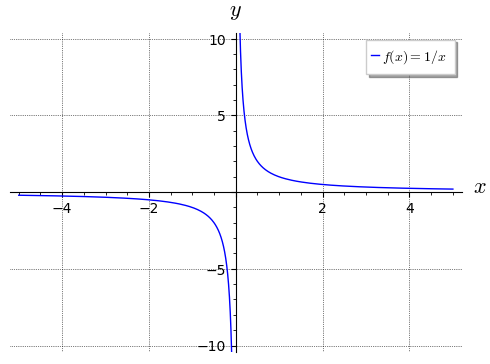

In [20]:
plot(1 / x, (x, -5, 5),
     ymin = -10, ymax = 10,
     detect_poles = True,
     axes_labels = ["$x$", "$y$"],
     legend_label = "$f(x) = 1/x$",
     gridlines = True,
     figsize = 5
)

Limita

$$ \lim_{x\to0} \frac{1}{x} $$

neexistuje (v BI-MA1 smyslu), protože jednostranné limity v nule jsou vzájemně různé.

Čistě pro zajímavost, graf komplexní funkce komplexní proměnné $f(z) = \frac{1}{z}$, $D_f = \mathbb{C} \smallsetminus \{0\}$ vypadá následovně.
Pokud se komplexní proměnná $z$ blíží bodu $0$, pak $\frac{1}{|z|}$ roste nadevšechny meze (v grafu je toto vyjádřeno "světlostí"), což přesně odpovídá tvrzení, že v bodě $0$ má limitu $\infty$.

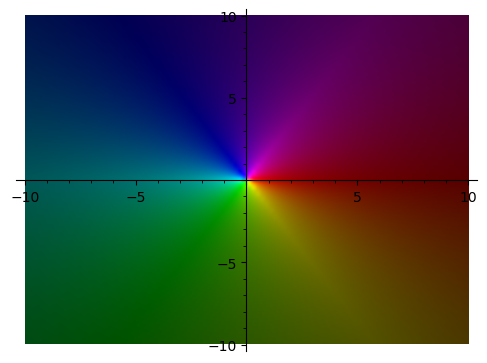

In [21]:
complex_plot(lambda z: 1 / z, (-10, 10), (-10, 10), figsize=5)

## 5.3 SageMath si poradí se známými limitami

Následující limitu posloupnosti známe z přednášky,

$$ \lim_{n\to\infty} \left( 1 + \frac{1}{n} \right)^n = e. $$

SageMath nám dá očekávaný výsledek, Eulerovo číslo.

In [22]:
limit((1 + 1/n)^n, n=oo)

e

Častým omylem založeným na _částečném limitění_ je tvrzení, že tato limita má hodnotu 1.
Tato špatná intuice pramení v provedení několika nezávislých výpočtů limit (proto _částečné_), pro které nemáme žedné opodstatnění v teorii.
Tento příklad je pěkný _protipříklad_ k takovémuto postupu. Tj. $1 + \frac{1}{n}$ má limitu $1$, že? A $1^n$ má limitu $1$? Ano, ale ne!


Eulerovo číslo je zde skutečně správným výsledkem.
Podívejme se třeba i na hodnoty příslušné posloupnosti a její graf.

In [23]:
a = [ (1 + 1/n)^n for n in range(1, 50) ]

table(columns=[range(1, 10), a[1:10], map(N, a[1:10])], header_row=["n", "$a_n$", "přibližně"])

n,\(a_n\),přibližně
\(1\),\(\frac{9}{4}\),\(2.25000000000000\)
\(2\),\(\frac{64}{27}\),\(2.37037037037037\)
\(3\),\(\frac{625}{256}\),\(2.44140625000000\)
\(4\),\(\frac{7776}{3125}\),\(2.48832000000000\)
\(5\),\(\frac{117649}{46656}\),\(2.52162637174211\)
\(6\),\(\frac{2097152}{823543}\),\(2.54649969704071\)
\(7\),\(\frac{43046721}{16777216}\),\(2.56578451395035\)
\(8\),\(\frac{1000000000}{387420489}\),\(2.58117479171320\)
\(9\),\(\frac{25937424601}{10000000000}\),\(2.59374246010000\)


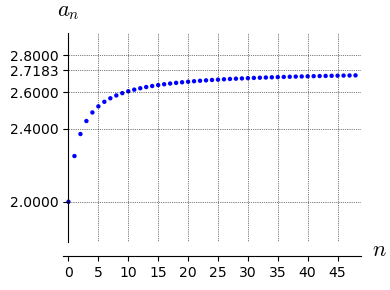

In [24]:
list_plot(a,
          ymin=1.8, ymax=2.9, gridlines=True, axes_labels=["$n$", "$a_n$"],
          ticks=[srange(0,50,5), [2,2.4,2.6,e,2.8]],
          figsize=4
         )

Vidíme, že jsme skutečně daleko od $1$.

Pro úplnost připomeňme přibližnou hodnotu Eulerova čísla.

In [25]:
N(e, digits=100)

2.718281828459045235360287471352662497757247093699959574966967627724076630353547594571382178525166427

### Další známé limity

Zná SageMath hodnoty známých a důležitých funkcí (ve všech případech jde o neurčité výrazy $0/0$)?

---

**Příklad**:

$$ \lim_{x \to 0} \frac{e^x - 1}{x} = 1 $$

Výpočet v SageMath:

In [26]:
limit((e^x - 1) / x, x=0)

1

Grafická reprezentace, soustřeďte se na bod $0$.

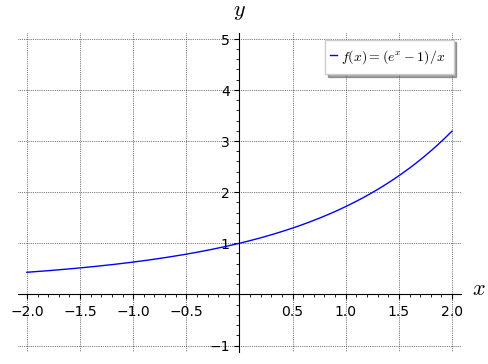

In [27]:
plot((exp(x) - 1) / x, (x, -2, 2),
     ymin = -1, ymax = 5,
     axes_labels = ["$x$", "$y$"],
     legend_label = "$f(x) = (e^x - 1)/x$",
     gridlines = True, figsize=5
)

---

**Příklad**:

$$ \lim_{x \to 0} \frac{\ln(x + 1)}{x} = 1 $$

Výpočet v SageMath.

In [28]:
limit(ln(x + 1) / x, x=0)

1

Grafická ilustrace, soustřeďte se opět na bod $0$.

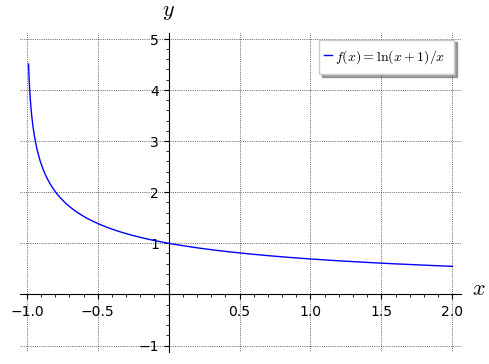

In [29]:
plot(ln(x + 1) / x, (x, -1, 2),
     ymin = -1, ymax = 5,
     axes_labels = ["$x$", "$y$"],
     legend_label = "$f(x) = \\ln(x+1)/x$",
     gridlines = True, figsize=5
)

---

**Příklad**:

$$ \lim_{x \to 0} \frac{\sin(x)}{x} = 1 $$

Spojité dodefinování funkce $\frac{\sin(x)}{x}$ v bodě $0$ je známé jako $\mathrm{sinc}$.

In [30]:
limit(sin(x) / x, x=0)

1

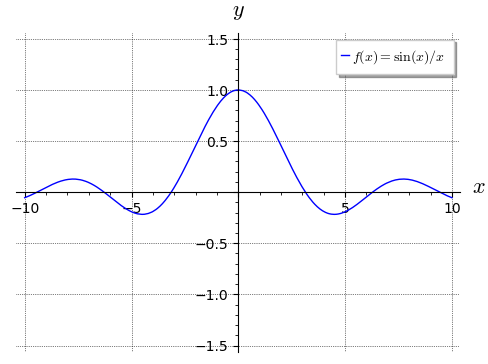

In [31]:
plot(sin(x) / x, (x, -10, 10),
     ymin = -1.5, ymax = 1.5,
     axes_labels = ["$x$", "$y$"],
     legend_label = "$f(x) = \\sin(x)/x$",
     gridlines = True, figsize=5
)

---

**Příklad**:

Podívejme se dále na funkci $\mathrm{sgn}$, znaménko.
Její jednostranné limity v bodě $0$ jsme prozkoumávali na přednášce.
V SageMath ji máme jako `sign`.

In [32]:
limit(sign(x), x=0, dir='+')

1

In [33]:
limit(sign(x), x=0, dir='-')

-1

In [34]:
limit(sign(x), x=0)

und

V tomto případě dostáváme `und`, tedy _undefined_. Většinou tato odpověď odpovídá situace, kdy limita neexistuje (což vidíme z hodnot jednostranných limit v $0$).

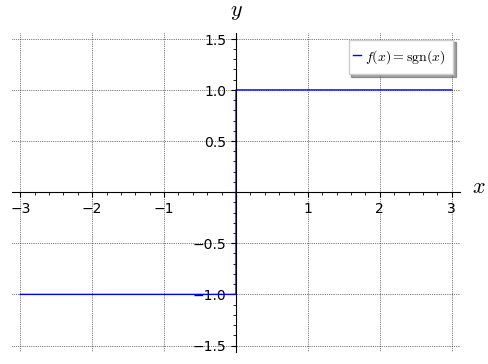

In [35]:
plot(sign(x), (x, -3, 3),
     ymin = -1.5, ymax = 1.5,
     axes_labels = ["$x$", "$y$"],
     legend_label = "$f(x) = \\mathrm{sgn}(x)$",
     gridlines = True, figsize=5
)

## 5.4 Problematický příklad

**Varování**: nikdy bezmezně nevěřte počítačovým algebraickým systémů při výpočtu limit, existuje mnoho příkladů, na kterých selhávají. U SageMath (resp. Maxima na pozadí) například:

In [36]:
limit(x^(1/2 - sin(x)), x=oo)

+Infinity

Tato funkce ve skutečnosti ale limitu nemá! To můžeme snadno vidět vybráním dvou posloupností prvků z definičního oboru jdoucích do nekonečna, kterými budeme kontrolovat znaménko exponentu.
Pro přehlednost si definujme naší funkci explicitně.

In [37]:
f(x) = x^(1/2 - sin(x))

A nyní se podívejme na její chování v bodech $2\pi n$, $n\in\mathbb{N}$:

In [38]:
limit(f(2*pi*n), n=oo)

+Infinity

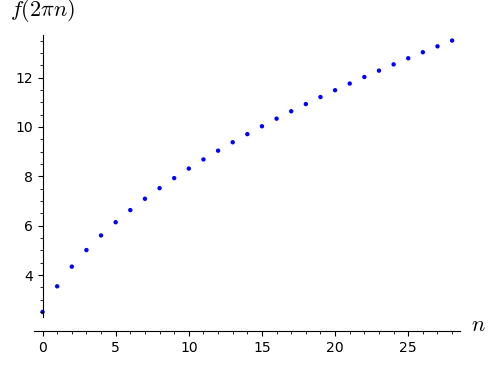

In [39]:
list_plot([f(2*pi*n) for n in range(1,30)], axes_labels=["$n$", "$f(2\\pi n)$"], figsize=5)

A poté v bodech $\frac{\pi}{2} + 2\pi n$, $n\in\mathbb{N}$.

In [40]:
limit(f(pi/2 + 2*pi*n), n=oo)

0

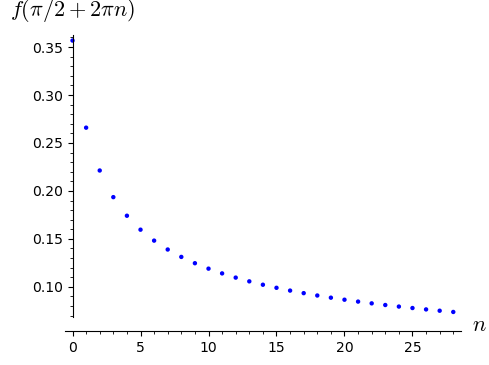

In [41]:
list_plot([f(pi/2 + 2*pi*n) for n in range(1,30)], axes_labels=["$n$", "$f(\\pi/2 + 2\\pi n)$"], figsize=5)

Celkový graf funkce.

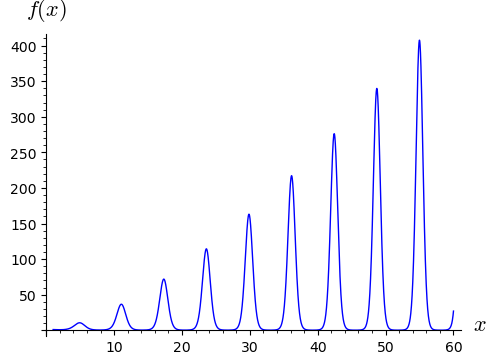

In [42]:
plot(f(x), (x, 1, 60), axes_labels=["$x$", "$f(x)$"], figsize=5)

Vždy se při procvičování snažte prověřit (například graficky), jestli uvedený výsledek vypadá důvěryhodně.
Pokud bychom chtěli argumentaci více vypilovat, museli bychom použít Heineho větu (zkuste!).

## 5.5 Heineho věta

V neposlední řadě se nyní pokusíme využít SageMath ke grafickému znázornění [Heineho věty](https://courses.fit.cvut.cz/BI-MA1/@master/textbook/sec-vlastnosti-limit.html#thm-heine), která studenty často trápí.

Stručně a lehce vágně řečeno, Heineho věta říká, že **funkce** $f$ má v bodě $a$ **limitu** $b$, právě když pro každou **posloupnost** $(x_n)_{n=1}^\infty$ prvků z definičního oboru funkce $f$ s limitou $a$ a různých od $a$ je **limita posloupnosti** $(f(x_n))_{n=a}^\infty$ rovna $b$.

Tj. ještě více intuitivně: funkce $f$ má v bodě $a$ limitu $b$, právě když funkční hodnoty $f(x_n)$ jdou k $b$ ať se k $a$ hodnotami $x_n$ blížíme jakýmkoliv způsobem.

Tuto větu nejčastěji používáme dvěma způsoby:

  1. Víme, že $\lim_{x \to a} f(x) = b$ (limita funkce), potom i $\lim_{n\to\infty} f(x_n) = b$ (limita posloupnosti) pro nějakou konkrétní posloupnost $(x_n)_{n=1}^\infty$ s limitou $a$ (s členy z $D_f$ různými od $a$).
  2. Pokud najdeme dvě posloupnosti $(x_n)_{n=1}^\infty$ a $(y_n)_{n=1}^\infty$ prvků z $D_f$ různých od $a$, ale majících limitu $a$ (tj. dva způsoby, jak se blížit k $a$) a současně posloupnosti $(f(x_n))_{n=1}^\infty$ a $(f(y_n))_{n=1}^\infty$ mají různé limity, pak nutně limita funkce $\lim_{x\to a} f(x)$ neexistuje.

---

**Příklad**: Na přednášce jsme odvodili limitu funkce

$$ \lim_{x\to+\infty} \left( 1 + \frac{1}{x} \right)^x = e. $$

Pokud zvolíme napříkald posloupnost $x_n = 2n$, pak díky Heineho větě takřka automaticky i víme, že

$$ \lim_{n\to\infty} \left( 1 + \frac{1}{2n} \right)^{2n} = e. $$

Označme si pro přehlednost konkrétní funkci:

In [43]:
f(x) = (1 + 1/x)^x

Následující obrázek obsahuje graf funkce $f$ (modrá křivka) a dále i body posloupnosti $(2n)_{n=1}^\infty$ (zelené body) a body posloupnosti $(f(2n))_{n=1}^\infty$ (červené body).
Bavíme se o limitě této funkce v nekončenu, jaké limity mají uvedené posloupnosti?
Promyslete si tento obrázek v kontextu Heineho věty.

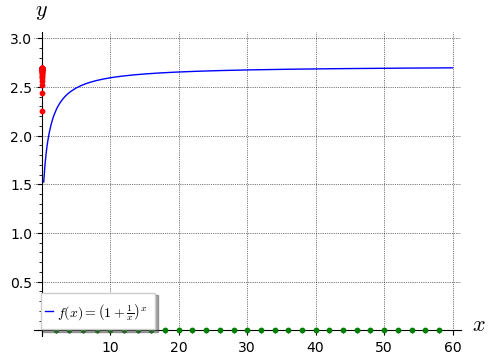

In [44]:
g1 = plot(f(x), (x, 0, 60), axes_labels = ["$x$", "$y$"],
          figsize = 5, gridlines = True, ymin = 0, ymax = 3,
          legend_label = "$f(x) = \\left( 1 + \\frac{1}{x} \\right)^x$",
)
g2 = scatter_plot([(2*n, 0) for n in range(1, 30)], markersize = 10,
                  facecolor = 'green', edgecolor = 'green'
)
g3 = scatter_plot([(0, f(2*n)) for n in range(1, 30)], markersize = 10,
                  facecolor = 'red', edgecolor = 'red'
)

g1 + g2 + g3

---

**Příklad**: Na přednášce jsme pomocí Heineho věty zkoumali chování funkce

$$ f(x) = \sin\left( \frac{1}{x} \right) $$

pro $x \to 0$.
Dle SageMath jde o neurčitý výraz:

In [45]:
f(x) = sin(1 / x)
limit(f(x), x=0)

ind

Z grafu je zřejmé, že u nuly nastává problém:

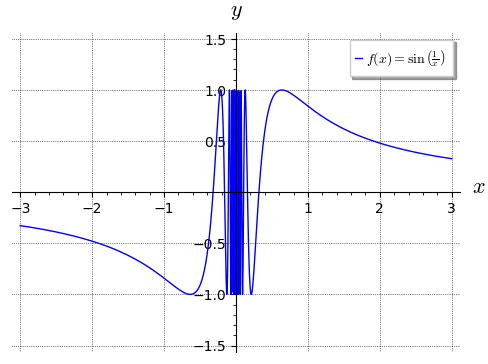

In [46]:
plot(f(x), (x, -3, 3), axes_labels = ["$x$", "$y$"],
     figsize = 5, gridlines = True, ymin = -1.5, ymax = 1.5,
     legend_label = "$f(x) = \\sin\\left( \\frac{1}{x} \\right)$"
    )

Zdá sem, že snadno vymyslíme dva způsoby, jak se s proměnnou $x$ blížit k nule tak, aby funkční hodnoty šly k různým hodnotám:

  * $x_n = \frac{1}{2\pi n} \to 0$,
  * $y_n = \frac{1}{2\pi n + \frac{\pi}{2}}$.

V prvním případě jsou funkční hodnoty $f(x_n)$ nulové, limita obrazů je rovna $0$. Na následujícím obrázku pomocí puntíků znázorňujeme _body_ $(x_n, f(x_n))$, jde tedy o lehce jiný pohled na věc než v předchozím příkladě.

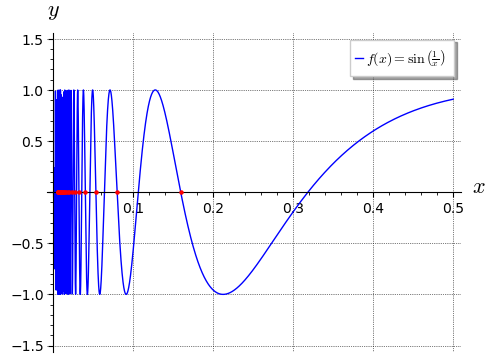

In [47]:
g1 = plot(f(x), (x, 0, 0.5), axes_labels = ["$x$", "$y$"],
          figsize = 5, gridlines = True, ymin = -1.5, ymax = 1.5,
          legend_label = "$f(x) = \\sin\\left( \\frac{1}{x} \\right)$"
         )
g2 = scatter_plot([(1/(2*pi*n), f(1/(2*pi*n))) for n in range(1, 30)], markersize = 5,
                  facecolor = 'red', edgecolor = 'red'
)

g1 + g2

V druhém případě jsou funkční hodnoty ale všechny rovné $1$:

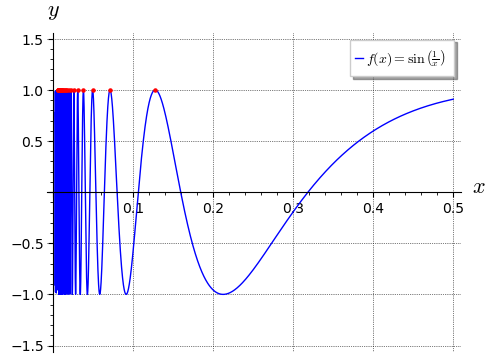

In [48]:
g1 = plot(f(x), (x, 0, 0.5), axes_labels = ["$x$", "$y$"],
          figsize = 5, gridlines = True, ymin = -1.5, ymax = 1.5,
          legend_label = "$f(x) = \\sin\\left( \\frac{1}{x} \\right)$"
         )
g2 = scatter_plot([(1/(2*pi*n + pi/2), f(1/(2*pi*n + pi/2))) for n in range(1, 30)], markersize = 5,
                  facecolor = 'red', edgecolor = 'red'
)

g1 + g2

## 5.6 Kdo počítá??

Doposud jsme v tomto notebooku výsledky připisovali programu SageMath.
Ve skutečnosti ale výpočet limit v předchozích příkladech na pozadí prováděl počítačový algebraický systém [Maxima](https://maxima.sourceforge.net/).

Pomocí nepovinného argumentu `algorithm` (ne zcela výstižné pojmenování) lze vynutit výpočet i v jiném počítačovém algebraickém systému, např. [Sympy](https://sympy.org).

In [49]:
limit(n^(1/n), n=oo, algorithm='sympy')

1

Nebo [giac](https://www-fourier.ujf-grenoble.fr/~parisse/giac.html), který pod kapotou používá GeoGebra.

In [51]:
limit(x^2 + sin(x), x=oo, algorithm='giac')

+Infinity

Možnosti každého z těchto nástrojů jsou různé.